# **PATTERN RECOGNITION ASSIGNMENT 1**

# **CO-324**

## **2021 Semester VI**

## **Submitted to: Sh. Anurag Goel**
### **Submitted By: Saksham Gera (2K18/EE/179) & Shivam Shaurya(2K18/EE/194)**


# **ANSWER 2: BANK NOTES CLASSIFICATION** 

## **Required Libraries:**

## **Numpy**


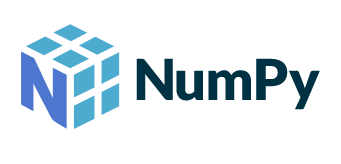

NumPy is the fundamental package for scientific computing in Python. It is a Python library that provides a multidimensional array object, various derived objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays, including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms, basic linear algebra, basic statistical operations, random simulation and much more.

Documentation Link: https://numpy.org/doc/stable/contents.html

### **Pandas** 

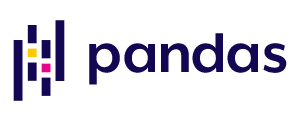

pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

Documentation Link: https://pandas.pydata.org/docs/


### **Sci-Kit Learn**

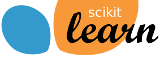

Scikit-learn is an open source machine learning library that supports supervised and unsupervised learning. It also provides various tools for model fitting, data preprocessing, model selection and evaluation, and many other utilities.

Documentation Link: https://scikit-learn.org/stable/


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import pandas as pd
from sklearn.model_selection import train_test_split

**About the Dataset**

The data is available in .csv file where each line corresponds to a bank note and the five values, separated by commas, are, in order, the four features (variance, skewness and kurtosis of Wavelet Transformed image and the entropy of the bank note image) and the class label, an integer with values 0 for real bank notes and 1 for fake bank notes.


In [22]:
url='https://raw.githubusercontent.com/killer4639/bank-note-authentication/master/data.csv'
df=pd.read_csv(url)

In [23]:
df.head()

,0.37637,-0.82358,0.78543,0.74524,1
0,3.24030,-3.70820,5.28040,0.41291,0
1,3.58290,1.44230,1.02190,1.40080,0
2,0.86202,2.69630,4.29080,0.54739,0
3,-0.21661,8.03290,1.88480,-3.88530,0
4,0.11806,0.39108,-0.98223,0.42843,1


### **For Priori = [0.1,0.9]**

In [24]:
train, test = train_test_split(df, test_size=0.5)

In [25]:
x_train=train.iloc[:,:-1]
x_train

,0.37637,-0.82358,0.78543,0.74524
310,4.36840,9.67180,-3.96060,-3.162500
1318,-4.14290,2.77490,0.68261,-0.719840
1055,0.33565,6.83690,0.69718,-0.556910
513,0.74307,11.17000,-1.38240,-4.072800
1262,2.61400,8.00810,-3.72580,-1.306900
...,...,...,...,...
982,-2.36750,-0.43663,1.69200,-0.430180
953,2.80840,11.30450,-3.33940,-4.419400
323,4.34350,3.32950,0.83598,0.649550
227,1.16400,3.91300,-4.55440,-3.867200


In [26]:
y_train=train.iloc[:,4]
y_train

310     0
1318    1
1055    0
513     0
1262    0
       ..
982     1
953     0
323     0
227     1
726     0
Name: 1, Length: 685, dtype: int64

In [27]:
x_test=test.iloc[:,:-1]
y_test=test.iloc[:,4]

In [28]:
x_train.to_numpy()
x_test.to_numpy()
y_train.to_numpy()
y_test.to_numpy()

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,

In [29]:
nb_model=GaussianNB(priors=[0.1,0.9])

In [30]:
fit_nb=nb_model.fit(x_train,y_train)

In [31]:
prediction=fit_nb.predict(x_test)
con_matrix=confusion_matrix(y_test,prediction)
print(con_matrix)

[[255 136]
 [  1 294]]


In [32]:
def diagonal_sum(con_matrix):
  sum=0
  totalSum=0
  for i in range(2):
    for j in range(2):
      totalSum+=con_matrix[i][j]
      if i==j:
        sum+=con_matrix[i][j]
  return sum,totalSum

In [33]:
sum,totalSum=diagonal_sum(con_matrix)
print(sum,totalSum)

549 686


In [34]:
print(f'Accuracy % : {sum/totalSum}')

Accuracy % : 0.8002915451895044


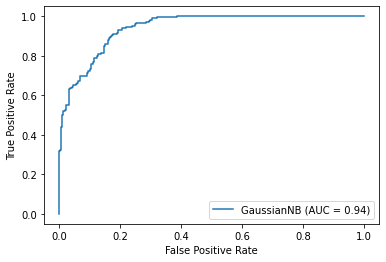

In [35]:
metrics.plot_roc_curve(fit_nb, x_test, y_test)
plt.show()  

### **For Priori = [0.5,0.5]**

In [36]:
url='https://raw.githubusercontent.com/killer4639/bank-note-authentication/master/data.csv'
df1=pd.read_csv(url)

In [37]:
df1.head()

,0.37637,-0.82358,0.78543,0.74524,1
0,3.24030,-3.70820,5.28040,0.41291,0
1,3.58290,1.44230,1.02190,1.40080,0
2,0.86202,2.69630,4.29080,0.54739,0
3,-0.21661,8.03290,1.88480,-3.88530,0
4,0.11806,0.39108,-0.98223,0.42843,1


In [38]:
train, test = train_test_split(df1, test_size=0.2)

In [39]:
x_train=train.iloc[:,:-1]
x_train

,0.37637,-0.82358,0.78543,0.74524
785,1.53560,9.17720,-2.27180,-0.735350
528,-0.69572,8.61650,1.84190,-4.328900
255,1.01350,8.45510,-1.67200,-2.081500
489,3.62440,1.46090,1.35010,1.928400
740,0.60050,0.99945,-2.21260,0.097399
...,...,...,...,...
271,-2.29870,-5.22700,5.63000,0.917220
1102,4.99230,7.86530,-2.35150,-0.719840
122,0.31803,-0.99326,1.09470,0.886190
517,3.52880,0.71596,1.95070,1.937500


In [40]:
y_train=train.iloc[:,4]
y_train

785     0
528     0
255     0
489     0
740     1
       ..
271     1
1102    0
122     1
517     0
311     0
Name: 1, Length: 1096, dtype: int64

In [41]:
x_test=test.iloc[:,:-1]
y_test=test.iloc[:,4]

In [42]:
x_train.shape

(1096, 4)

In [43]:
nb_model=GaussianNB(priors=[0.5,0.5])

In [44]:
fit_nb=nb_model.fit(x_train,y_train)


In [45]:
prediction=fit_nb.predict(x_test)
con_matrix=confusion_matrix(y_test,prediction)
print(con_matrix)

[[120  22]
 [ 19 114]]


In [46]:
def diagonal_sum(con_matrix):
  sum=0
  totalSum=0
  for i in range(2):
    for j in range(2):
      totalSum+=con_matrix[i][j]
      if i==j:
        sum+=con_matrix[i][j]
  return sum,totalSum

In [47]:
sum,totalSum=diagonal_sum(con_matrix)
print(sum,totalSum)

234 275


In [48]:
print(f'Accuracy % : {sum/totalSum}')

Accuracy % : 0.850909090909091


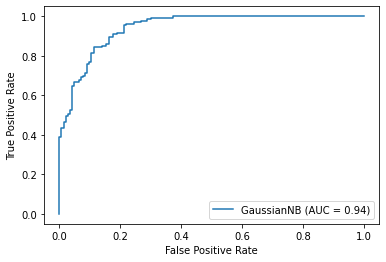

In [49]:
metrics.plot_roc_curve(fit_nb, x_test, y_test)
plt.show()  